<a href="https://www.kaggle.com/code/shaheerhussain/cardio-analysis?scriptVersionId=145466512" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio/covid_data.csv
/kaggle/input/cardio/cardio_base.csv
/kaggle/input/cardio/cardio_alco.csv


In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [44]:
caardio_alco_df = pd.read_csv("/kaggle/input/cardio/cardio_alco.csv")
caardio_base_df = pd.read_csv("/kaggle/input/cardio/cardio_base.csv")


In [45]:
print(caardio_alco_df.head())
print(caardio_base_df.head())
print("---------------------------------------------")
# Basic statistics for numeric columns in "caardio_base" dataframe
basic_stats_base = caardio_base_df.describe()
print(basic_stats_base)
# Basic statistics for numeric columns in "caardio_alco" dataframe
basic_stats_alco = caardio_alco_df.describe()
print(basic_stats_alco)

# Info about the data types and missing values
print(caardio_base_df.info())
print(caardio_alco_df.info())

  id;alco
0    44;0
1    45;0
2    46;0
3    47;0
4    49;0
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
0   0  18393       2     168    62.0    110     80            1      0
1   1  20228       1     156    85.0    140     90            3      0
2   2  18857       1     165    64.0    130     70            3      0
3   3  17623       2     169    82.0    150    100            1      0
4   4  17474       1     156    56.0    100     60            1      0
---------------------------------------------
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.0000

In [46]:

# Get unique values for each column in the "caardio_alco" dataframe (excluding 'id')
unique_values_alco = {}
for column in caardio_alco_df.columns:
    if column != 'id':
        unique_values_alco[column] = caardio_alco_df[column].unique()

# Get unique values for each column in the "caardio_base" dataframe (excluding 'id')
unique_values_base = {}
for column in caardio_base_df.columns:
    if column != 'id':
        unique_values_base[column] = caardio_base_df[column].unique()

# Print unique values for each column in both dataframes
print("Unique Values in caardio_alco:")
for column, values in unique_values_alco.items():
    print(f"{column}: {values}")

print("\nUnique Values in caardio_base:")
for column, values in unique_values_base.items():
    print(f"{column}: {values}")

Unique Values in caardio_alco:
id;alco: ['44;0' '45;0' '46;0' ... '99951;0' '99952;0' '99954;0']

Unique Values in caardio_base:
age: [18393 20228 18857 ... 14925 17727 17926]
gender: [2 1]
height: [168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]
weight: [ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.

In [47]:
caardio_base_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

In [50]:
# Handling missing values by dropping rows with any missing values
caardio_base_df.dropna(inplace=True)

# Handling outliers in 'ap_hi' and 'ap_lo' columns using the IQR method
Q1 = caardio_base_df['ap_hi'].quantile(0.25)
Q3 = caardio_base_df['ap_hi'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove rows with outliers in 'ap_hi'
caardio_base_df = caardio_base_df[(caardio_base_df['ap_hi'] >= lower_bound) & (caardio_base_df['ap_hi'] <= upper_bound)]

# Repeat the same process for 'ap_lo'
Q1_lo = caardio_base_df['ap_lo'].quantile(0.25)
Q3_lo = caardio_base_df['ap_lo'].quantile(0.75)
IQR_lo = Q3_lo - Q1_lo

upper_bound_lo = Q3_lo + 1.5 * IQR_lo
lower_bound_lo = Q1_lo - 1.5 * IQR_lo

caardio_base_df = caardio_base_df[(caardio_base_df['ap_lo'] >= lower_bound_lo) & (caardio_base_df['ap_lo'] <= upper_bound_lo)]


In [51]:
summary_stats = caardio_base_df.describe()
print(summary_stats)


                 id           age        gender        height        weight  \
count  64502.000000  64502.000000  64502.000000  64502.000000  64502.000000   
mean   49966.522418  19491.930033      1.351896    164.457381     74.261698   
std    28855.797580   2458.792155      0.477565      8.148252     14.142242   
min        0.000000  10859.000000      1.000000     55.000000     11.000000   
25%    24924.250000  17720.000000      1.000000    159.000000     65.000000   
50%    50009.500000  19716.000000      1.000000    165.000000     72.000000   
75%    74878.750000  21343.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol         smoke  
count  64502.000000  64502.000000  64502.000000  64502.000000  
mean     126.623469     81.789433      1.364252      0.087625  
std       14.384632      7.713269      0.680269      0.282751  
min       90.000000     65.00000

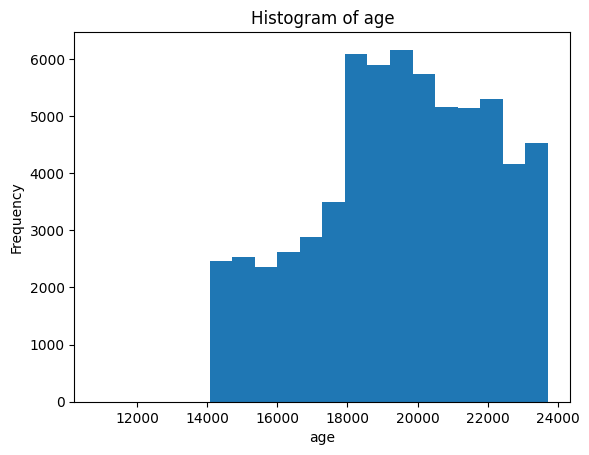

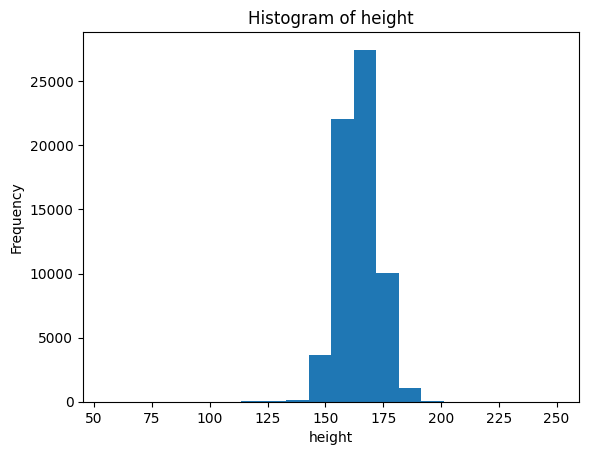

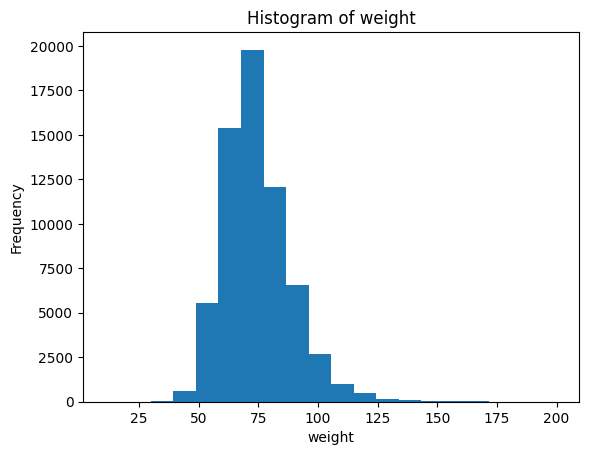

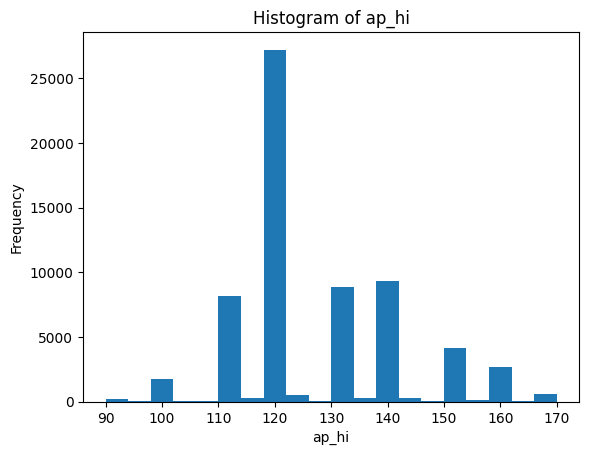

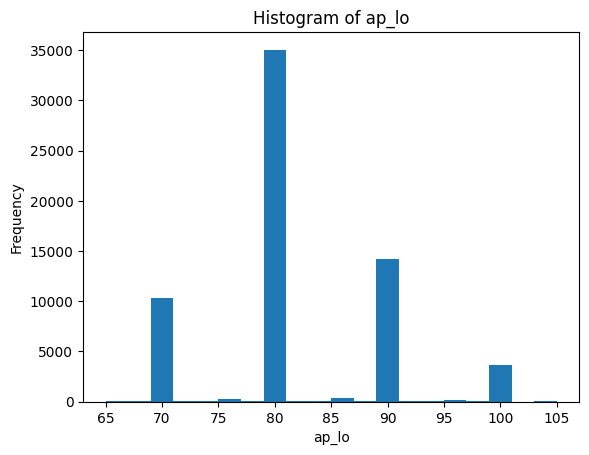

In [52]:
import matplotlib.pyplot as plt

numerical_features = ["age", "height", "weight", "ap_hi", "ap_lo"]
for feature in numerical_features:
    plt.hist(caardio_base_df[feature], bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


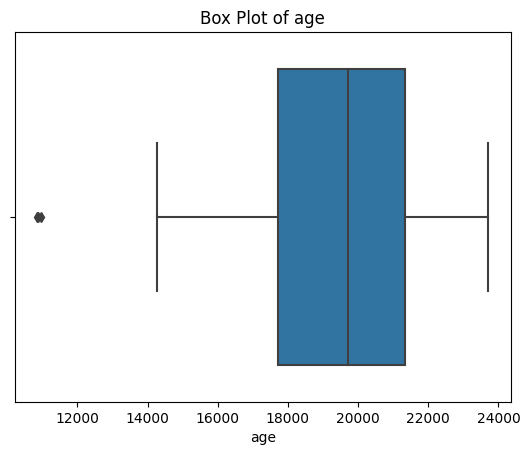

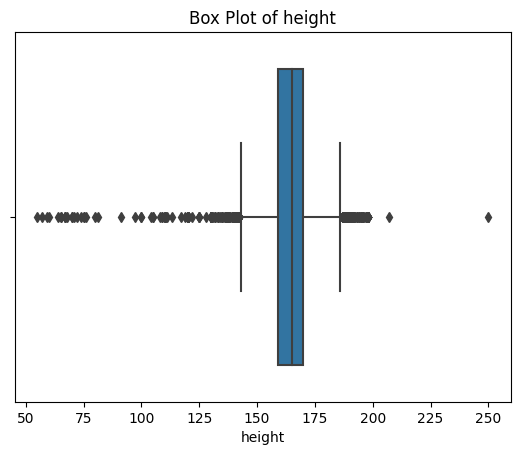

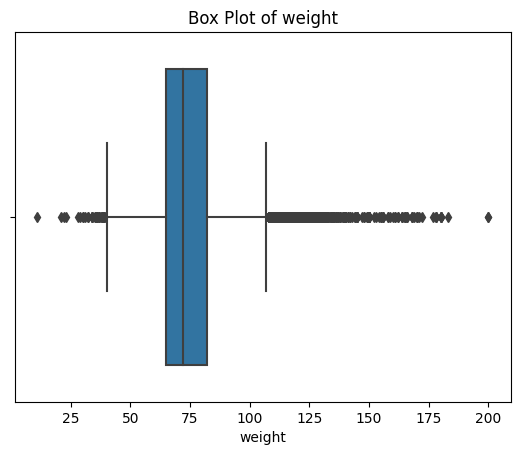

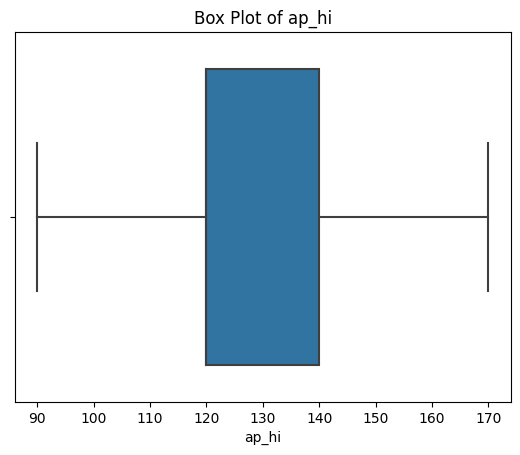

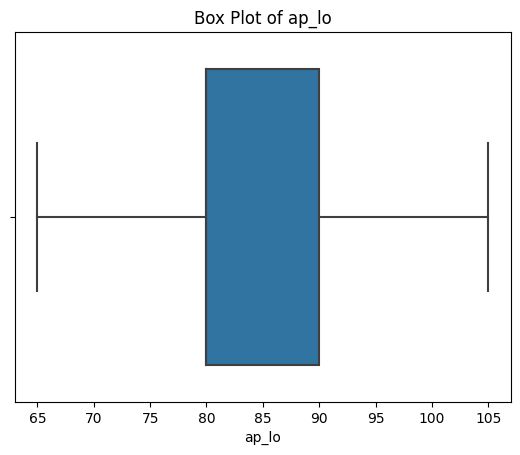

In [53]:
import seaborn as sns

for feature in numerical_features:
    sns.boxplot(x=caardio_base_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


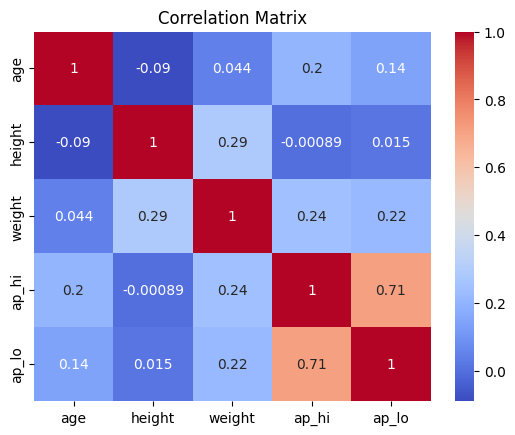

In [54]:
correlation_matrix = caardio_base_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

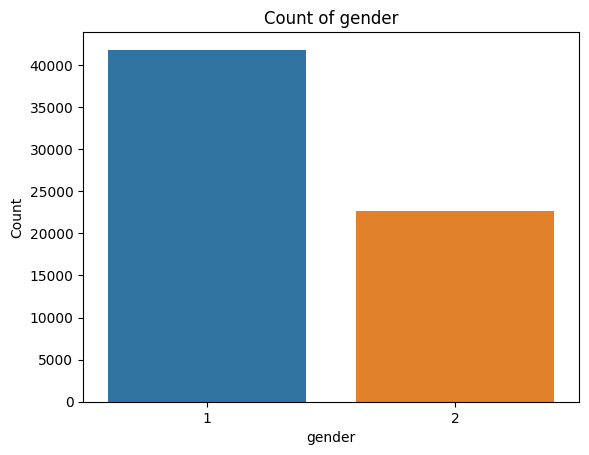

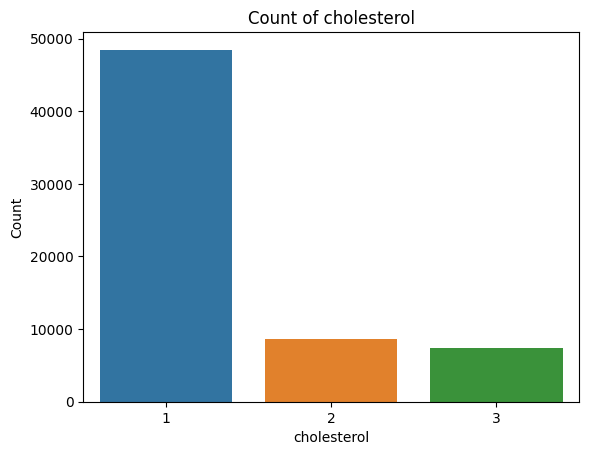

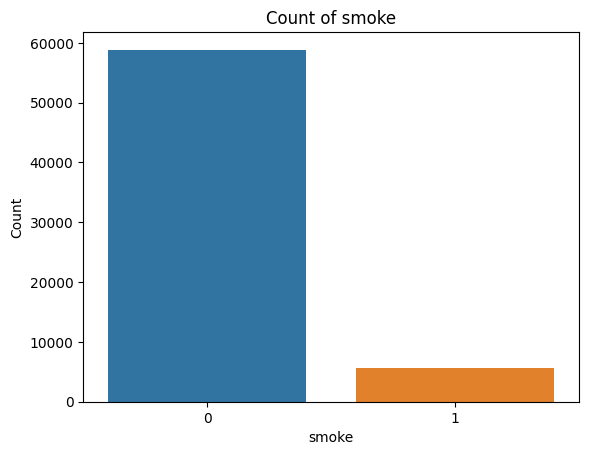

In [55]:
categorical_features = ["gender", "cholesterol", "smoke"]
for feature in categorical_features:
    sns.countplot(x=feature, data=caardio_base_df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


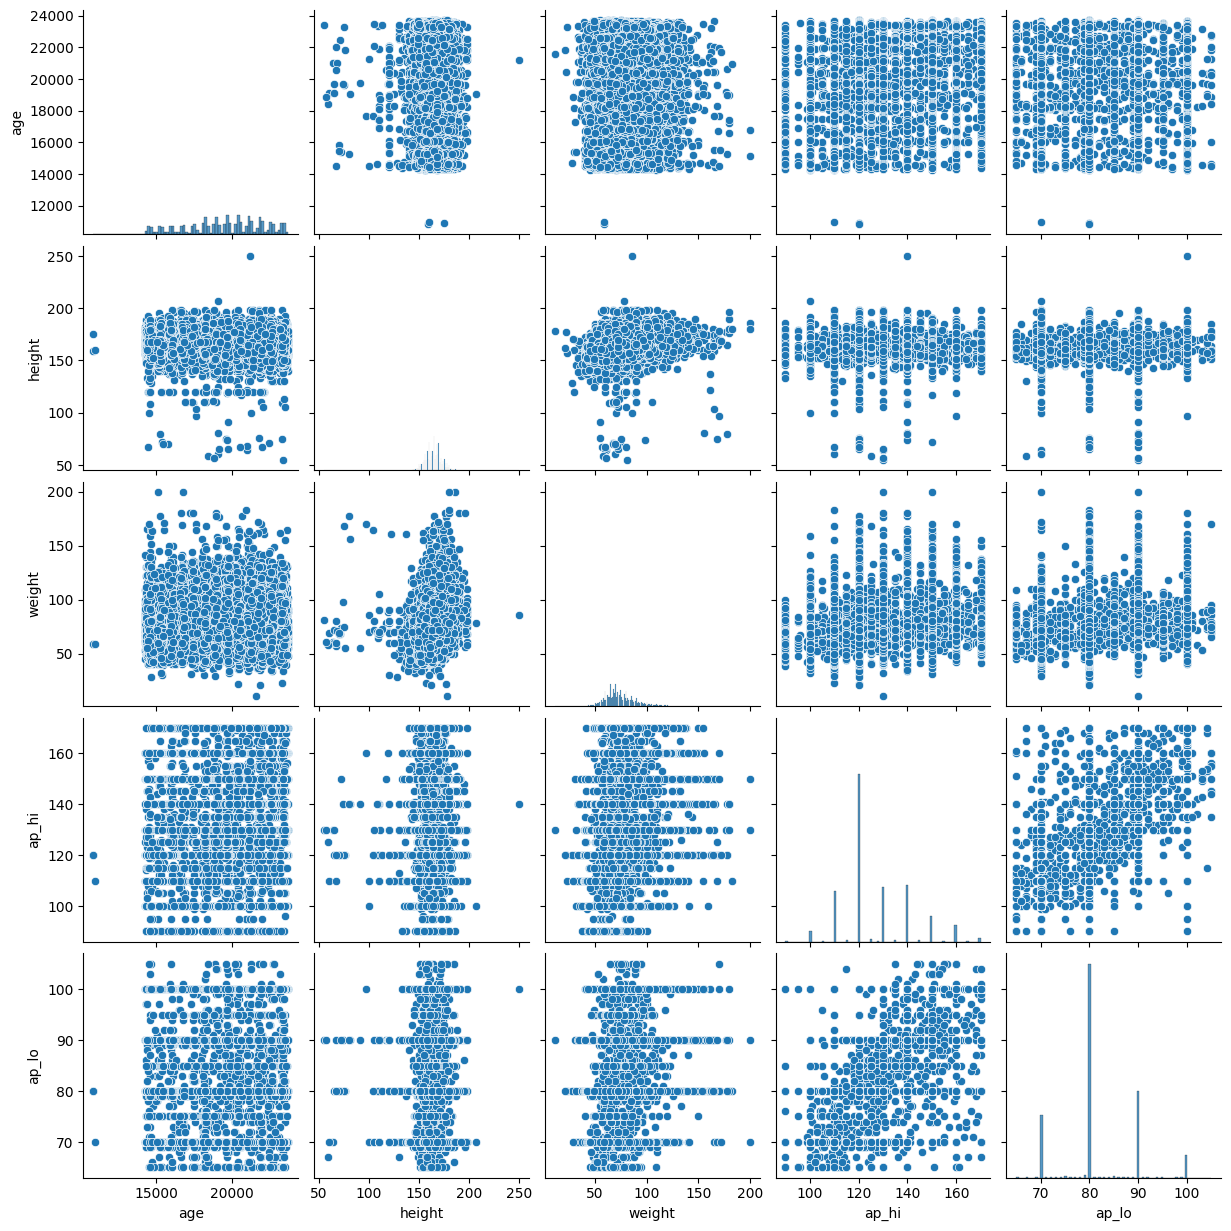

In [56]:
sns.pairplot(caardio_base_df[numerical_features])
plt.show()

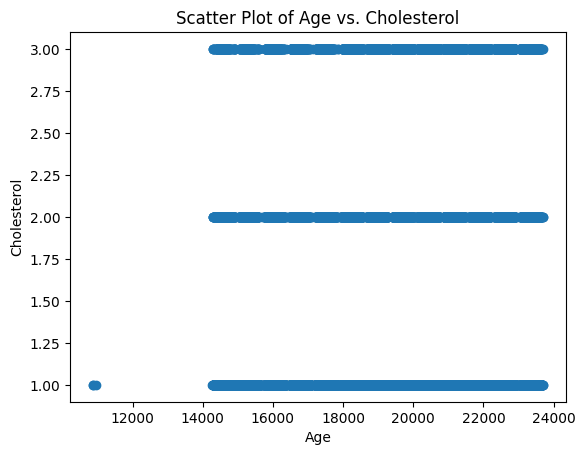

In [57]:
plt.scatter(caardio_base_df['age'], caardio_base_df['cholesterol'])
plt.title('Scatter Plot of Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

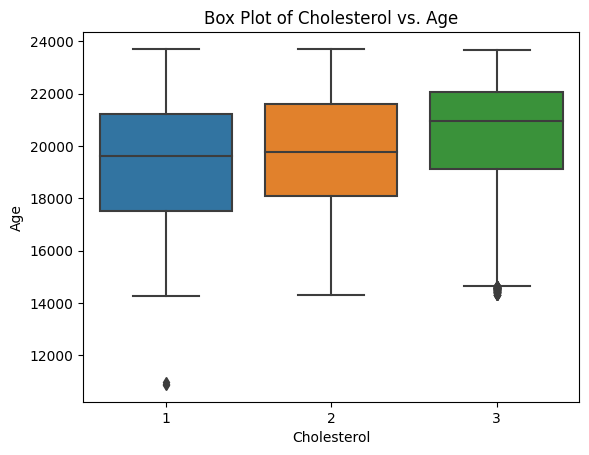

In [58]:
sns.boxplot(x='cholesterol', y='age', data=caardio_base_df)
plt.title('Box Plot of Cholesterol vs. Age')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

In [59]:
# Calculate BMI and add it as a new feature
caardio_base_df['BMI'] = caardio_base_df['weight'] / ((caardio_base_df['height'] / 100) ** 2)


In [60]:
from scipy.stats import ttest_ind

female_ap_hi = caardio_base_df[caardio_base_df['gender'] == 0]['ap_hi']
male_ap_hi = caardio_base_df[caardio_base_df['gender'] == 1]['ap_hi']

t_stat, p_value = ttest_ind(female_ap_hi, male_ap_hi)
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

# Interpretation based on p-value (e.g., p < 0.05 indicates a significant difference)
if p_value < 0.05:
    print("There is a significant difference in 'ap_hi' between genders.")
else:
    print("There is no significant difference in 'ap_hi' between genders.")


T-Statistic: nan
P-Value: nan
There is no significant difference in 'ap_hi' between genders.
